
# MNIST 데이터 탐색

이 예에서는 MNIST 데이터를 탐색하는 것을 소개하겠다.

<img src="files/mnist_digits.png">

MNIST는 기계학습 분야에서 가장 기본적으로 사용되는 데이터로서, 0부터 9까지 숫자를 손으로 쓴 데이터들을 포함하고 있다. 여기서는 MNIST 데이터 파일을 다운로드 하고, 프로그램에 로드하고, 데이터 내용을 확인하는 절차를 소개하겠다.

이 과정에서, 바이너리(binary) 데이터 파일이 어떻게 구성되어 있는지를 살펴볼 것이다. 실제로 대부분의 센서 데이터들이 이와 같이 바이너리 데이터로 생성되어 있다. 바이너리 데이터로 구성되어 있는 원시 데이터로부터 그 내용 (여기서는 숫자)를 판독하는 과정을 소개할 것이다. 

이 데이터는 사람들에게 종이 위에 검정색 잉크로 0부터 9까지의 숫자를 쓰도록 하여 만든 데이터이다. 손글씨 이미지를 스캔하여 기계학습 알고리즘 테스트에 사용하고 있다.

실험에는 2가지 데이터 세트를 사용하는데, SD-1 데이터세트는 고등학생들이 쓴 글자를 기초로 하여 조금 알아보기가 어렵고, DS-3 데이터 세트는 어른들이 작성을 하여, 좀 더 알아보기기 쉽다. SD-3 데이터는 원래는 훈련용 데이터로 사용하고, DS-1 데이터는 테스트용으로 사용하려고 했던 것이다. 그런데 LeCun은 이 2가지 데이타를, 원래의 의도대로 분리해서 사용하지 않고 섞어서 훈련용과 테스트 용으로 사용하였다. 

한가지 언급할 것은, 여기서 소개하는 MNIST 데이터는 이미 많은 수정과정을 거친 바이너리 데이터라는 것이다. 처음에 손으로 쓴 데이타는, 이보다 훨씬 잡음(noise)이 많이 섞여 있어 알아보기 어려운 형태이다.


이 이미지 데이터는 모두 20x20 픽셀 크기로 일정하게 정규화 되어 있어 다루기가 편리하게 되어 있다. LeCun의 웹사이트에서 이 데이터를 가져올 것이다. 이 예제에서 사용할 데이터는 사실 많은 과정을 거쳐서 분석하기 편리하게 변환되어 있다는 것을 알아야 한다. 실제로 원시 데이터로부터 분석에 사용할만한 데이터를 얻으려면 많은 노력을 하여 데이타를 전처리(preprocess) 해야 한다.

예를 들어 원래 이미지 데이터는 흑과 백의 두가지 상태만을 나타내는 (0 과 1) 픽셀로 구성되어 있었는데, 이를 (0 ~ 255) 사이의 값을 갖는 그레이 스케일로 바꾸었다. 또한 [center of mass](https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.ndimage.measurements.center_of_mass.html) 방식을 사용하여 이미지의 무게 중심 (center of mass)이 픽셀 이미지 데이터의 중심 위치에 오도록 조정하였다. 이렇게 정리된 파일이 LeCun의 웹사이트에서 제공되는 이미지 파일이다. 

이와같이 NIST의 기관이 사람들을 고용하여 손글씨를 쓰게 하고, 이를 정리하고, 또한 LeCun같은 사람이 이를 분석하기 편리하게 이미지를 조정하는 등의 작업을 거쳐서 비로소 이미지분석에 사용할만한 데이터가 만들어졌다는 것을 기억해야 한다. 데이터 분석에서 가장 어렵고 시간이 오래 걸리는 영역이 바로 분석에 사용할 수 있는 형태의 데이터를 확보하는 일이다.

MNIST 데이터 수집 예에서 소개한 load_mnist() 함수를 이용하여 데이터를 로드하겠다.

In [2]:
from data.load_mnist import load_mnist
training_images, training_labels, testing_images, testing_labels = load_mnist()

먼저 레이블의 분포를 살펴보겠다. 즉, 0, 1, 2, .. 9 등의 숫자가 균등하게 분포하고 있는지를 살펴보겠다.

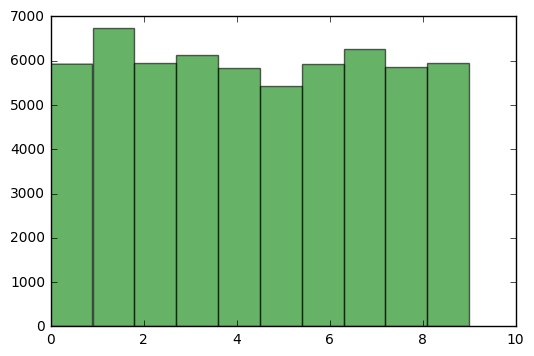

Counter({1: 6742, 7: 6265, 3: 6131, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 8: 5851, 4: 5842, 5: 5421})


In [136]:
plt.hist(training_labels, alpha=.6, color='g', bins=10)
plt.show()

from collections import Counter
counter = Counter(training_labels)
print(counter)

위를 보면 거의 균등하게 분포하는 것을 알 수 있다. 이제 각 샘플을 구성하는 실제 값들이 얼마인지를 살펴보겠다.

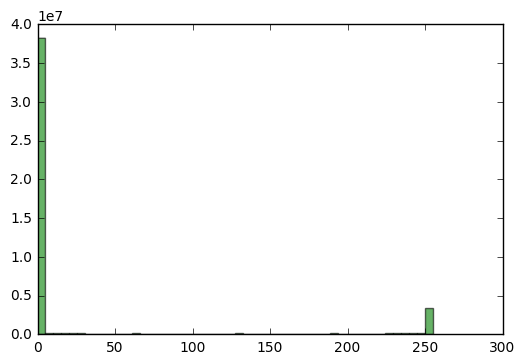

Counter({0: 38045844, 253: 1513207, 254: 801557, 252: 653888, 255: 314282, 251: 117808, 128: 74946, 250: 59559, 191: 51987, 64: 46754, 13: 40100, 249: 39342, 5: 39148, 7: 38856, 4: 38267, 9: 38234, 247: 37941, 6: 37692, 244: 37199, 29: 37160, 243: 37029, 233: 36800, 3: 36040, 11: 36020, 241: 35573, 21: 35496, 248: 35418, 245: 35397, 226: 35378, 10: 35282, 19: 34431, 246: 33844, 2: 33653, 240: 33422, 234: 33219, 57: 31905, 236: 31555, 242: 31218, 8: 30878, 232: 30253, 12: 30139, 25: 29995, 20: 29955, 170: 29853, 237: 29676, 228: 29370, 231: 29365, 235: 29130, 16: 29115, 203: 28907, 32: 28890, 15: 28869, 17: 27551, 239: 27474, 225: 27285, 141: 27102, 84: 27088, 41: 27023, 230: 26957, 14: 26939, 238: 26914, 18: 26849, 22: 26750, 223: 26221, 31: 26205, 198: 26112, 24: 25950, 38: 25922, 222: 25839, 86: 25837, 214: 25724, 169: 25562, 85: 25496, 28: 25434, 227: 25350, 213: 25289, 168: 25069, 51: 25003, 217: 24890, 221: 24794, 114: 24774, 37: 24760, 26: 24260, 47: 24237, 215: 24176, 224: 24175

In [141]:
pixels = training_images.flatten()

plt.hist(pixels, alpha=.6, color='g', bins=50)
plt.show()

counter = Counter(pixels)
print(counter)

위의 그래프와 결과를 보면 값이 '0'인 경우의 수가 워낙 많아서 다른 값들이 거의 보이지 않는 것을 알 수 있다. 값이 '0'인 것을 제외하고 다시 그려보겠다.

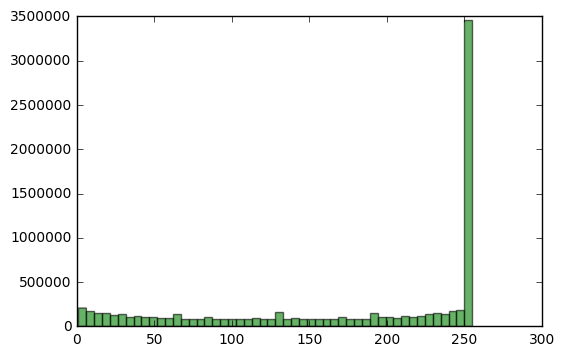

Counter({253: 1513207, 254: 801557, 252: 653888, 255: 314282, 251: 117808, 128: 74946, 250: 59559, 191: 51987, 64: 46754, 13: 40100, 249: 39342, 5: 39148, 7: 38856, 4: 38267, 9: 38234, 247: 37941, 6: 37692, 244: 37199, 29: 37160, 243: 37029, 233: 36800, 3: 36040, 11: 36020, 241: 35573, 21: 35496, 248: 35418, 245: 35397, 226: 35378, 10: 35282, 19: 34431, 246: 33844, 2: 33653, 240: 33422, 234: 33219, 57: 31905, 236: 31555, 242: 31218, 8: 30878, 232: 30253, 12: 30139, 25: 29995, 20: 29955, 170: 29853, 237: 29676, 228: 29370, 231: 29365, 235: 29130, 16: 29115, 203: 28907, 32: 28890, 15: 28869, 17: 27551, 239: 27474, 225: 27285, 141: 27102, 84: 27088, 41: 27023, 230: 26957, 14: 26939, 238: 26914, 18: 26849, 22: 26750, 223: 26221, 31: 26205, 198: 26112, 24: 25950, 38: 25922, 222: 25839, 86: 25837, 214: 25724, 169: 25562, 85: 25496, 28: 25434, 227: 25350, 213: 25289, 168: 25069, 51: 25003, 217: 24890, 221: 24794, 114: 24774, 37: 24760, 26: 24260, 47: 24237, 215: 24176, 224: 24175, 27: 24025, 

In [142]:
pixels = [pixel for pixel in training_images.flatten() if pixel != 0]

plt.hist(pixels, alpha=.6, color='g', bins=50)
plt.show()

counter = Counter(pixels)
print(counter)

위 그래프를 보면 절대 다수의 값이 '0' 이었고. 250 과 250을 조금 넘는 값이 꽤 많이 분포하는 것을 알 수 있다. 그 이외의 숫자들은 비슷한 분포를 보이고 있다. 이러한 분석은 데잍터를 시각화 하는데 중요한 절차이다. 앞에서 소개한 MNIST 데이터 수집 프로그램에서 각 숫자가 어떻게 구성되는지를 소개했었다.

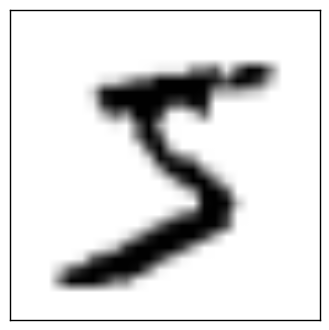

In [15]:
import matplotlib.pyplot as plt 
%matplotlib inline

def plot(image):
    plt.imshow(image, cmap='gray_r')
    plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')
    plt.show()
    

image = training_images[0]
plot(image)

위의 이미지를 보면 경계가 흐릿한 것을 알 수 있는데, 원래 MNIST 데이터는 0 아니면 1 이었으나 이를 그레이스케일로 바꾸면서 이렇게 바뀐 것이다. 오직 흑과 백 두가지로만 구성된 이미지와 어떻게 다른지를 비교해보겠다. 이를 위해서는 중간 값을 없애고 0과 1만으로 변환하는 작업을 하면 된다.

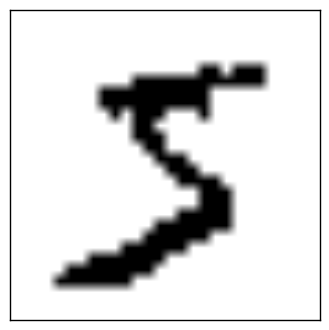

In [144]:
import numpy as np
binary_training_images = np.array(training_images)
binary_training_images[binary_training_images < (256 / 2)] = 0
binary_training_images[binary_training_images >= (256 / 2)] = 1

image = binary_training_images[0]
plot(image)

위의 결과를 보면 0 과 1 만으로 구성된 파일로 바꾸어도 결과 이미지는 경계가 흐릿하게 보인다는 것이다. 이는 사람의 시각에 관한 문제이다. 이제 평균적으로 숫자 들이 어떻게 보이는지를 살펴보겠다.

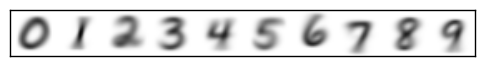

In [145]:
values = np.unique(training_labels)

images = []
for value in values:
    examples = training_images[training_labels == value]
    average = np.average(examples, axis=0)
    images.append(average)

image = np.concatenate(images, axis=1)
plot(image)

이 평균적인 숫자들은 경계가 흐릿하게 보인다. 이제 경계치 (threshold) 값을 지정하여 이미지를 흑과 백으로 나누어 그리면 어떻게 보이는지 비교해보겠다.

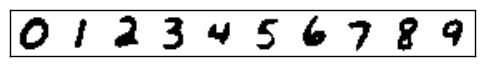

In [147]:
def binarize_image(threshold):
    binarized_image = np.array(image)
    binarized_image[image < threshold] = 0
    binarized_image[image >= threshold] = 1
    plot(binarized_image)

binarize_image(100)

경계치를 여러가지로 바꾸어 실행해 본 결과 경계치를 75로 하였을 때까 가장 숫자들이 깨끗하게 보이는 것을 알 수 있었다.

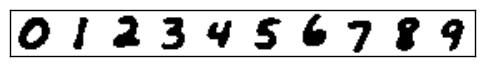

In [148]:
binarize_image(75)

위를 보면 눈으로 보기에 분명하게 구분되는 것으로 보인다. 이 이미지를 사용하여 글자 인식을 할 수 있을 것이다. 앞에서 보인 것과 같이 평균치로 만든 숫자 이미지보다 이것이 더 분명해 보인다. 즉 평균치가 최적의 기준이라고 할 수 없다. 임의의 숫자 '0' 이미지들과 평균치가 어떻게 다른지 살펴보겠다.

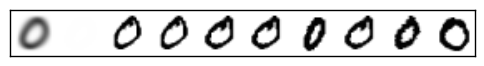

In [149]:
from random import shuffle

images = []

# average 0
examples = training_images[training_labels == 0]
average = np.average(examples, axis=0)
images.append(average)

# binarized 0
threshold = 75
binarized_image = np.array(average)
binarized_image[average < threshold] = 0
binarized_image[average >= threshold] = 1
images.append(binarized_image)

# 8 random examples
shuffle(examples)

for example in examples[:8]:
    images.append(example)

image = np.concatenate(images, axis=1)
plot(image)

위에 평균치로 그린 '0'의 이미지, 경계치를 75로 설정한 바이너리 '0'의 이미지, 그리고 8개의 램덤한 '0' 이미지를 보였다. 그런데 두번째 항목인 바이너리 이미지가 보이지 않는 것을 알 수 있다.

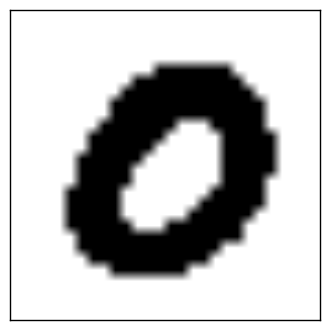

In [150]:
images = []

# average 0
examples = training_images[training_labels == 0]
average = np.average(examples, axis=0)
images.append(average)

# binarized 0
threshold = 75
binarized_image = np.array(average)
binarized_image[average < threshold] = 0
binarized_image[average >= threshold] = 1
plot(binarized_image)

위와 같이 바이너리 이미지만 그리면 나타나는 것을 알 수 있다. 그러면 평균 이미지와 바이너리 이미지를 나란히 그려보겠다.

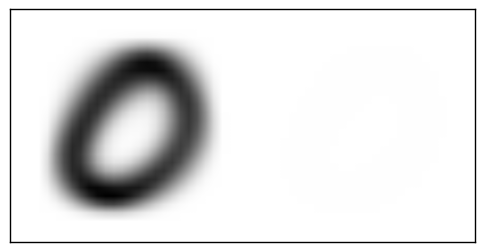

In [151]:
images = []

# average 0
examples = training_images[training_labels == 0]
average = np.average(examples, axis=0)
images.append(average)

# binarized 0
threshold = 75
binarized_image = np.array(average)
binarized_image[average < threshold] = 0
binarized_image[average >= threshold] = 1
images.append(binarized_image)

image = np.concatenate(images, axis=1)
plot(image)

두 숫자를 나란히 그리면 평균 이미지만 보이고 바이너리 이미지는 보이지 않는 것을 알 수 있다. 왜 그럴까?

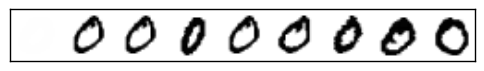

In [152]:
images = []

# average 0
examples = training_images[training_labels == 0]
average = np.average(examples, axis=0)
# images.append(average)

# binarized 0
threshold = 75
binarized_image = np.array(average)
binarized_image[average < threshold] = 0
binarized_image[average >= threshold] = 1
images.append(binarized_image)

# 8 random examples
shuffle(examples)

for example in examples[:8]:
    images.append(example)

image = np.concatenate(images, axis=1)
plot(image)

바이너리 이미지와 8개의 랜덤한 '0' 이미지를 그리게 하여도 바이너리 이미지만 보이지 않는다. 혹시 바이너리 이미지를 구성하는 데이터에 문제가 있는 것은 아닌지 확인해보겠다.

In [154]:
print(np.unique(average))
print(np.unique(binarized_image))
print(np.unique(examples[0]))

[  0.00000000e+00   1.68833361e-03   1.85716698e-03   2.02600034e-03
   2.70133378e-03   3.37666723e-03   4.89616748e-03   5.57150093e-03
   5.90916765e-03   6.41566774e-03   6.58450110e-03   7.25983454e-03
   7.42866790e-03   8.27283471e-03   8.61050144e-03   8.77933480e-03
   8.94816816e-03   9.96116833e-03   1.02988350e-02   1.06365018e-02
   1.18183353e-02   1.21560020e-02   1.23248354e-02   1.28313355e-02
   1.38443356e-02   1.41820024e-02   1.43508357e-02   1.51950025e-02
   1.53638359e-02   1.55326693e-02   1.72210029e-02   1.75586696e-02
   1.97535033e-02   2.04288367e-02   2.09353368e-02   2.16106703e-02
   2.21171704e-02   2.29613372e-02   2.34678372e-02   2.38055040e-02
   2.43120041e-02   2.60003377e-02   2.65068378e-02   2.68445045e-02
   2.71821712e-02   2.75198379e-02   2.76886713e-02   2.92081715e-02
   2.93770049e-02   3.30913388e-02   3.37666723e-02   3.66368394e-02
   3.86628398e-02   4.01823400e-02   4.15330069e-02   4.27148405e-02
   4.28836738e-02   4.30525072e-02

이미지를 구성하는 데이터가 실제로 어떤 값들인지를 확인해보니 3가지 데이터가 매우 다른 패턴을 가진 것을 알 수 있다. 즉, 값의 범위가 매우 달라서, 매우 큰 숫자들, [0, 1] 두가지 숫자들, 그리고 0-256 사이의 숫자들 등 세가지 패턴의 데이터로 구성된 것을 알 수 있다. 이러한 데이터들을 동시에 화면에 그리려고 하면 matplotlib 라이브러리가 자동으로 스케일을 조정하므로 값이 작은 경우 예를 들어 0과 1사이의 값은 보이지 않게 된 것이다. 즉 바이너리 데이터는 0과 1의 값만 가지므로 상대적으로 모두 흰색으로 보인 것이다.

이를 해결하기 위해서 0~1 사이의 값을 0~256으로 변환하여 그리면 다음과 같이 된다.

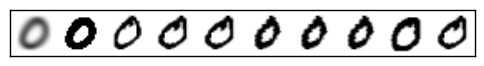

In [156]:
images = []

# average 0
examples = training_images[training_labels == 0]
average = np.average(examples, axis=0)
images.append(average)

# binarized 0
threshold = 75
binarized_image = np.array(average)
binarized_image[average < threshold] = 0
binarized_image[average >= threshold] = 256
images.append(binarized_image)

# 8 random examples
shuffle(examples)

for example in examples[:8]:
    images.append(example)

image = np.concatenate(images, axis=1)
plot(image)

이제 그래프 문제가 해결되었다. 이와 같이 값의 스케일이 다른 그래프를 동시에 화면에 그릴 때에는 스케일을 맞추어주는 것을 주의하여야 한다.

위 결과를 보면, 평균 이미지는 너무 흐릿한 문제가 있고, 바이너리 이미지는 너무 두껍게 나타나는 문제가 있다. 이러한 현상이 '0'이 아닌 다른 숫자들에서도 나타나는 현상인지 확인해보겠다.

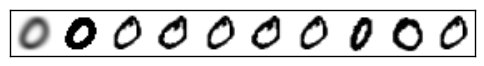

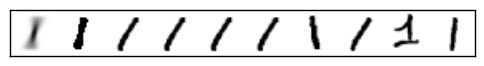

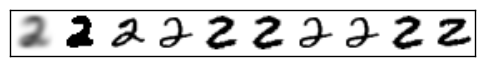

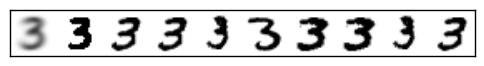

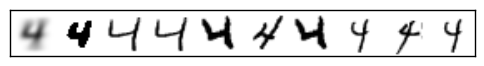

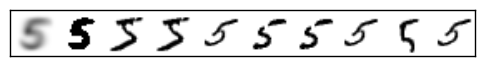

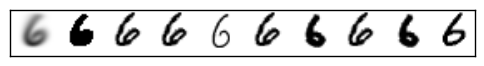

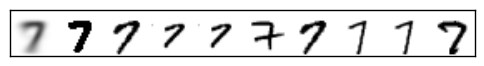

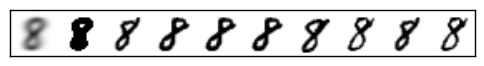

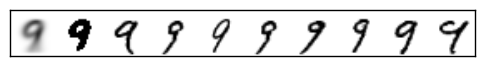

In [157]:
def function(number):
    images = []

    # average 0
    examples = training_images[training_labels == number]
    average = np.average(examples, axis=0)
    images.append(average)

    # binarized 0
    threshold = 75
    binarized_image = np.array(average)
    binarized_image[average < threshold] = 0
    binarized_image[average >= threshold] = 256
    images.append(binarized_image)

    # 8 random examples
    shuffle(examples)

    for example in examples[:8]:
        images.append(example)

    image = np.concatenate(images, axis=1)
    plot(image)
    
    
numbers = range(0, 10)
for number in numbers:
    function(number)

위의 결과를 보면 모든 숫자에 대해서 같은 현상이 나타나는 것을 알 수 있다. 평균치는 너무 흐린 문제가 있고, 바이너리 숫자는 너무 두꺼운 문제가 있다. 따라서 숫자를 판독하는데 있어 평균 이미지 또는 바이너리 이미지를 사용하는 것보다 임의의 숫자에서 랜덤하게 선택하는 것이 성능이 가장 우수할 것이라고 예상할 수 있다.

이외에도 MNIST 데이터를 탐색하는 여러가지 방법이 있을 것이다. 다양한 데이터 탐색에 대해서는 아래 사이트를 참조하기 바란다. http://colah.github.io/posts/2014-10-Visualizing-MNIST/.